Importação de bibliotecas

In [66]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statistics as st
sns.set()
sns.set_context('notebook')
%matplotlib inline

# Gerando amostras pseudoaleatórias

In [153]:
X = np.random.poisson(5, size=(500, 50))

#np.random.normal gera números aleatórios de distribuição normal
#loc = média, scale = desvio padrão
#size = tamanho da amostra, foi utilizado o formato (500, n) para gerar uma matriz de 500 linhas e n colunas,
#ou seja, 1000 amostras, cada uma com n observações.
#*Modificar o valor de n para ver as diferenças no gráfico de distribuição

In [154]:
sample_mean = list()
for row in X:
  sample_mean.append(np.mean(row))

#sample_mean é uma lista vazia.
#O loop for criado itera sobre cada linha da matriz e adiciona, ao final da lista, a média dos valores da linha.


In [155]:
x_barra = np.array(sample_mean)
x_barra[:10]
#Convertemos o objeto do tipo list em numpy array para usar os métodos do numpy.
#Checamos as 10 primeiras linhas, ou 10 primeiras médias amostrais.

array([5.14, 4.92, 5.1 , 5.52, 5.72, 4.56, 5.12, 4.7 , 4.7 , 4.94])

# Visualização

[Text(0, 0.5, 'Probabilidades')]

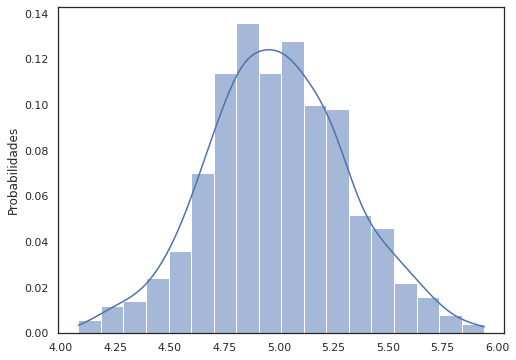

In [205]:
sns.set_style('white')

plt.figure(figsize=(8,6))

fig = sns.histplot(data = x_barra, 
             stat='probability', 
             kde=True)

fig.set(ylabel='Probabilidades')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


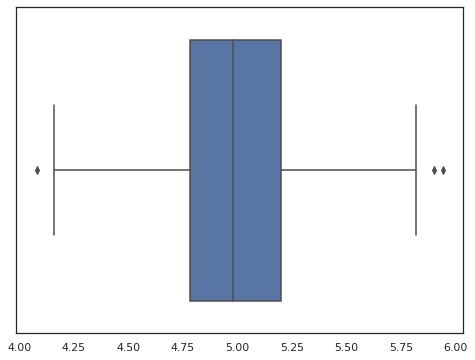

In [204]:
sns.set_style('white')
plt.figure(figsize=(8, 6))

fig = sns.boxplot(x_barra)